# Assignment 1: CitiBike Hypothesis Testing (Continued)

### Peer Review Feedback from Yu (yc3300)

- verify that their Null and alternative hypotheses are formulated correctly Ian's null hypothesis sounds reasonable, and the alternate hypothesis corresponds correctly to the null hypothesis. But in order to keep synchronization,maybe the null hypothesis should also include information(measurements) like in seconds. His topic is overall very general, more specific information like whether it's weekdays or weekends could be added, or male subscriber and female subscriber. 

- The data has the appropriate features to answer the question (duration time and gender)

- This is a question of comparing two unknown sample means, therefore I will consider Z-test or t-test. In Ian's answer, he already used Z-test to answer the hypothesis. His solution is clear and reasonable.

### Author Comments

I agree with Yu that the measurement unit should be added to the Null Hypothesis so it is more specific. Analyzing the duration by weeekend and weekday is an alternative to comparing between gender. However, this is beyond the scope of this analysis and can be easily done by replacing gender with day features using the same statistical test mechanics. 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Ian/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
path = "https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip"
df = pd.read_csv(path, compression='zip')

In [3]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1
5,189,2017-07-01 00:08:06,2017-07-01 00:11:16,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29477,Subscriber,1990.0,1
6,421,2017-07-01 00:09:03,2017-07-01 00:16:04,3267,Morris Canal,40.712419,-74.038526,3202,Newport PATH,40.727224,-74.033759,29643,Subscriber,1985.0,2
7,494,2017-07-01 00:14:10,2017-07-01 00:22:25,3202,Newport PATH,40.727224,-74.033759,3269,Brunswick & 6th,40.726012,-74.050389,29505,Subscriber,1984.0,1
8,152,2017-07-01 00:20:25,2017-07-01 00:22:58,3211,Newark Ave,40.721525,-74.046305,3278,Monmouth and 6th,40.725685,-74.048790,26159,Subscriber,1972.0,1
9,537,2017-07-01 00:29:22,2017-07-01 00:38:19,3199,Newport Pkwy,40.728745,-74.032108,3209,Brunswick St,40.724176,-74.050656,26170,Subscriber,1994.0,1


### High Level Data Exploration

In [5]:
print("There are %i samples in this dataset. " % df.shape[0])

There are 33573 samples in this dataset. 


In [7]:
df["age"] = 2017 - df["birth year"]
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,30613.000000,33573.000000,30613.000000
mean,767.952313,3215.375748,40.722388,-74.046067,3211.434397,40.721945,-74.045550,28300.428469,1980.348806,1.121645,36.651194
std,4038.930644,33.843146,0.007892,0.010625,79.019466,0.007731,0.010726,1646.539891,9.983384,0.538774,9.983384
min,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1887.000000,0.000000,16.000000
25%,248.000000,3187.000000,40.716540,-74.050389,3186.000000,40.716247,-74.049638,26275.000000,1975.000000,1.000000,29.000000
50%,384.000000,3203.000000,40.721124,-74.043991,3202.000000,40.719586,-74.043117,29266.000000,1983.000000,1.000000,34.000000
75%,676.000000,3225.000000,40.727224,-74.038526,3214.000000,40.727224,-74.038051,29521.000000,1988.000000,1.000000,42.000000
max,485426.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000,130.000000


In [27]:
# What is the count breakdown of each gender?

df['gender'].groupby(df['gender']).count()

gender
0     3079
1    23331
2     7163
Name: gender, dtype: int64

In [7]:
df["age"] = 2017 - df["birth year"]
age_tripDuration = df[["age", "tripduration"]]
age_tripDuration.head(10)

,age,tripduration
0,23.0,340
1,37.0,439
2,33.0,186
3,48.0,442
4,31.0,170
5,27.0,189
6,32.0,421
7,33.0,494
8,45.0,152
9,23.0,537


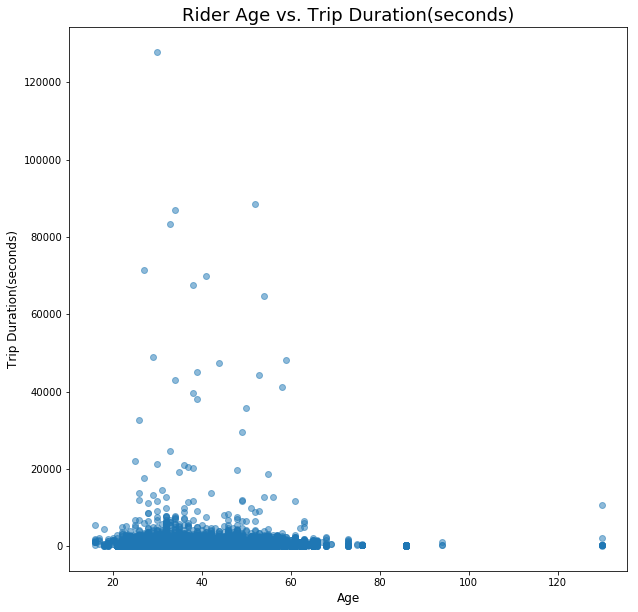

In [71]:
fig = plt.figure(figsize = (10,10));
plt.plot(age_tripDuration.age, age_tripDuration.tripduration, "o", alpha = 0.5);
plt.xlabel("Age", size = 12);
plt.ylabel("Trip Duration(seconds)", size = 12);
plt.title("Rider Age vs. Trip Duration(seconds)", size = 18);

plt.savefig("./screenshots/age_duration.png")

### Figure 1
This is a scatter plot of ages of riders (x axis) and the corresponding trip duration in seconds (y axis). Although the majority of the trips are short and driven by people from 20-60 old, there are many outliers in both aspects. The age outliers might be caused by data management or user input error. Some outliers in trip duration may indicate longer usage for tourism instead of daily short commute.

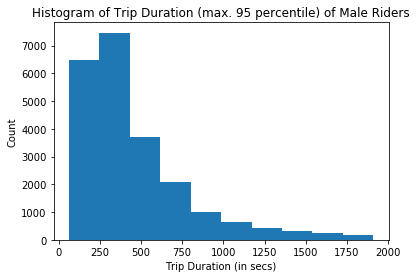

In [72]:
# What is the distribution of trip duration by gender?

data = df[(df.tripduration < df.tripduration.quantile(.95)) & (df.gender == 1)]
plt.hist(data.tripduration);
plt.xlabel("Trip Duration (in secs)");
plt.ylabel("Count");
plt.title("Histogram of Trip Duration (max. 95 percentile) of Male Riders");
plt.savefig("./screenshots/tripDurationMale.png")

### Figure 2
This is a histogram of trip duration (max. 75 percentile) taken by male riders. Most male riders take rides less than 10 mins.

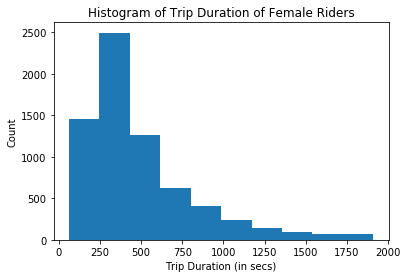

In [73]:
data = df[(df.tripduration < df.tripduration.quantile(.95)) & (df.gender == 2)]
plt.hist(data.tripduration);
plt.xlabel("Trip Duration (in secs)");
plt.ylabel("Count");
plt.title("Histogram of Trip Duration of Female Riders");
plt.savefig("./screenshots/tripDurationFemale.png")

### Figure 3
This is a histogram of trip duration (max. 95 percentile) taken by female riders. There seem to be less female riders who ride around 2 mins.

## Develop Hypothesis

#### Question:
Does gender have an impact on ride duration (in secondes)?

#### Null Hypothesis:
The average trip duration of male rider is the same or longer than the ones by female riders

#### Alternative Hypothesis:
The average trip duration in seconds of male rider is lower than female riders' with a confidence threashold of 95% (Z score > 2)

# Perform a Z Test on Data without Outliers

<div id = "z_value" > $Z = \frac{(u_f - u_m) \sqrt N_f}{std_f}$ </div>
where 
- $u_f$ is the mean of female trip duration
- $u_m$ is the mean of trip duration by male riders
- $N_f$ is the total number of observation of trips by female riders
- $std_f$ is the standard deviation of trip duration by female riders

In [65]:
# Calculate Z test variables by excluding outliers in trip duration.

quntile = 0.95

meanDurationM = df.loc[(df.tripduration < df.tripduration.quantile(quntile)) & (df.gender == 1)]['tripduration'].mean()
meanDurationF = df.loc[(df.tripduration < df.tripduration.quantile(quntile)) & (df.gender == 2)]['tripduration'].mean()
N = len(df.loc[(df.tripduration < df.tripduration.quantile(quntile)) & (df.gender == 2)]['tripduration'])
std = df.loc[(df.tripduration < df.tripduration.quantile(quntile)) & (df.gender == 2)]['tripduration'].std()

z = (meanDurationF-meanDurationM)*np.sqrt(N)/std

In [66]:
print("the average duration for male: " + str(meanDurationM))

the average duration for male: 456.14179402


In [67]:
print("the average duration for female: " + str(meanDurationF))

the average duration for female: 488.326435442


In [68]:
print("the number of trips by female: " + str(N))

the number of trips by female: 6862


In [69]:
print("the standard deviation: " + str(std))

the standard deviation: 338.09037031


In [70]:
print("The Z-Value is: " + str(z))

The Z-Value is: 7.8857177888


### Observation

The z-value is larger than the reuqired threshold of 2. The Null Hypothesis is rejected. Therefore, there is a statistical significance in trip duration by the gender. 